In [ ]:
#used to import files
from google.colab import files
uploaded = files.upload()

Saving health_readmissions.csv to health_readmissions.csv


In [ ]:
#used to import files
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
import pandas as pd
# df = pd.read_csv('train.csv')
df = pd.read_csv('health_readmissions.csv')

print(df.head())
print(df.info())
# print(df['career_start'].value_counts())

  age;sex;residence_type;systolic_bp;diastolic_bp;cholesterol;hemoglobin;past_visits;length_of_stay;insurance_status;readmitted_within_30days
0     69;F;Suburban;107;72;171.0;15.9;5.0;7;Public;0                                                                                         
1    32;F;Suburban;131;92;235.0;12.7;5.0;7;Private;0                                                                                         
2    89;M;Suburban;150;84;150.0;13.0;0.0;5;Private;0                                                                                         
3         78;M;Rural;155;107;232.0;12.4;2.0;6;None;0                                                                                         
4       38;M;Urban;153;93;250.0;12.0;4.0;4;Private;0                                                                                         
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column                               

In [ ]:
import pandas as pd

# Step 1. Loading and cleaning data
df = pd.read_csv('train.csv')
df.drop(['id', 'bdate', 'langs', 'education_status', 'life_main', 'people_main',
         'city', 'last_seen', 'occupation_type', 'occupation_name',
         'career_start', 'career_end'], axis=1, inplace=True)

# Step 1.1 Fill missing values in 'education_form' with the most common option
popular_option = df['education_form'].value_counts().index[0]
df['education_form'].fillna(popular_option, inplace=True)

# Step 1.2 Convert 'education_form' to numeric values
def Education_values(education_form):
    if education_form == 'Full-time':
        return 1
    elif education_form == 'Distance Learning':
        return 2
    else:
        return 3

df['education_form'] = df['education_form'].apply(Education_values)

# Step 2. Creating a model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.drop('result', axis=1)
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print('Percentage of correctly predicted outcomes:', accuracy_score(y_test, y_pred) * 100)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(df.info())


Percentage of correctly predicted outcomes: 81.40556368960469
Confusion matrix:
[[794 144]
 [237 874]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              8193 non-null   int64  
 1   has_photo        8193 non-null   int64  
 2   has_mobile       8193 non-null   float64
 3   followers_count  8193 non-null   float64
 4   graduation       8193 non-null   float64
 5   education_form   8193 non-null   int64  
 6   relation         8193 non-null   float64
 7   result           8193 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 512.2 KB
None


/tmp/ipython-input-1783405703.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education_form'].fillna(popular_option, inplace=True)


In [ ]:
import pandas as pd

# Step 1. Loading and cleaning data
df = pd.read_csv('train.csv')
df.drop(['id', 'bdate', 'langs','education_form','education_status','life_main','people_main','city','last_seen','occupation_type','occupation_name','career_start','career_end'], axis=1, inplace=True)



# Step 2. Creating a model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.drop('result', axis=1)
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print('Percentage of correctly predicted outcomes:', accuracy_score(y_test, y_pred) * 100)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(df.info())


Percentage of correctly predicted outcomes: 82.52806246949731
Confusion matrix:
[[806 147]
 [211 885]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              8193 non-null   int64  
 1   has_photo        8193 non-null   int64  
 2   has_mobile       8193 non-null   float64
 3   followers_count  8193 non-null   float64
 4   graduation       8193 non-null   float64
 5   relation         8193 non-null   float64
 6   result           8193 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 448.2 KB
None


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Step 1. Load and clean training data
df_train = pd.read_csv('train.csv')
df_train.drop(['id', 'bdate', 'langs', 'education_form', 'education_status',
               'life_main', 'people_main', 'city', 'last_seen', 'occupation_type',
               'occupation_name', 'career_start', 'career_end'], axis=1, inplace=True)

X_train = df_train.drop('result', axis=1)
y_train = df_train['result']

# Step 2. Load and clean test data
df_test = pd.read_csv('test.csv')
ID = df_test['id']  # Save user IDs for final output
df_test.drop(['id', 'bdate', 'langs', 'education_form', 'education_status',
              'life_main', 'people_main', 'city', 'last_seen', 'occupation_type',
              'occupation_name', 'career_start', 'career_end'], axis=1, inplace=True)

# Step 3. Preprocess data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(df_test)

# Step 4. Train model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_scaled, y_train)

# Step 5. Predict on test data
y_pred = classifier.predict(X_test_scaled)

# Step 6. Save predictions to CSV
result = pd.DataFrame({'id': ID, 'result': y_pred})
result.to_csv('submission.csv', index=False)

In [ ]:
import pandas as pd

# Step 1. Loading and cleaning data
df = pd.read_csv('titanic.csv')
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# ✅ Fix: Avoid chained assignment warning
df['Embarked'] = df['Embarked'].fillna('S')
df.drop('Embarked', axis=1, inplace=True)

age_1 = df[df['Pclass'] == 1]['Age'].median()
age_2 = df[df['Pclass'] == 2]['Age'].median()
age_3 = df[df['Pclass'] == 3]['Age'].median()

def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return age_1
        if row['Pclass'] == 2:
            return age_2
        return age_3
    return row['Age']

df['Age'] = df.apply(fill_age, axis=1)

def fill_sex(sex):
    if sex == 'male':
        return 1
    return 0

df['Sex'] = df['Sex'].apply(fill_sex)

# Step 2. Creating a model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print('Percentage of correctly predicted outcomes:', accuracy_score(y_test, y_pred) * 100)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(df.info())


Percentage of correctly predicted outcomes: 80.71748878923766
Confusion matrix:
[[115  22]
 [ 21  65]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None


In [ ]:
import pandas as pd
df = pd.read_csv('Space_Corrected.csv')

In [ ]:
print(df['Status Mission'].value_counts())
pivot = df.pivot_table(
    index='Country',
    columns='Status Mission',
    values='Location',  # or any non-null column just to count
    aggfunc='count',
    fill_value=0
)

print(pivot.head())


Status Mission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64
Status Mission  Failure  Partial Failure  Prelaunch Failure  Success
Country                                                             
Australia             3                0                  0        3
Barents Sea           1                0                  0        2
Brazil                2                0                  1        0
China                19                6                  0      243
France               13                5                  0      285


In [ ]:
# Filter only successful missions
success_only = df[df['Status Mission'] == 'Success']

# Count how many times each country appears
top_country = success_only['Country'].value_counts().head(5)

print(top_country)


Country
Russia        1303
USA           1186
Kazakhstan     608
France         285
China          243
Name: count, dtype: int64


In [ ]:
print(df['Location'].value_counts())

Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan        235
Site 132/1, Plesetsk Cosmodrome, Russia           216
Site 43/4, Plesetsk Cosmodrome, Russia            202
Site 41/1, Plesetsk Cosmodrome, Russia            198
Site 1/5, Baikonur Cosmodrome, Kazakhstan         193
                                                 ... 
Santa Rita 2, San Marco Launch Platform, Kenya      1
LC-576A1, Vandenberg AFB, California, USA           1
Site 250, Baikonur Cosmodrome, Kazakhstan           1
LC-18B, Cape Canaveral AFS, Florida, USA            1
LC-11, Cape Canaveral AFS, Florida, USA             1
Name: count, Length: 137, dtype: int64


In [ ]:
# Extract the part after the last comma
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

print(df['Country'].head())


0           USA
1         China
2           USA
3    Kazakhstan
4           USA
Name: Country, dtype: object


In [ ]:
print(df['Company Name'].value_counts())

Company Name
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

In [ ]:
print(df['Datum'].iloc[2])

None


In [ ]:

# Create an empty list to store country names
countries = []

# Loop through each value in the Location column
for location in df['Location']:
    # Split the string by comma
    parts = location.split(',')

    # Get the last item in the split list (the country)
    country = parts[len(parts) - 1]

    # Remove extra spaces from the country name
    country = country.strip()

    # Add to the list
    countries.append(country)

# Create the new Country column
df['Country'] = countries

# Print the first 5 values
print(df['Country'].head())
print(df['Country'].value_counts())

0           USA
1         China
2           USA
3    Kazakhstan
4           USA
Name: Country, dtype: object
Country
Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
Iran                                13
New Zealand                         13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
Barents Sea                          3
Brazil                               3
South Korea                          3
Gran Canaria                         2
Shahrud Missile Test Site            1
Yellow Sea                           1
Pacific Missile Range Facility       1
Name: count, dtype: int64

In [ ]:
# Extract hour as text from the datetime string
#def extract_hour(datum):
    #return datum.split()[4].split(':')[0]  # Gets '05' from '05:12'

#df['Hour'] = df['Datum'].apply(extract_hour)

print(df['Company Name'].head())
print(df['Datum'].head())

0       SpaceX
1         CASC
2       SpaceX
3    Roscosmos
4          ULA
Name: Company Name, dtype: object
0    Fri Aug 07, 2020 05:12 UTC
1    Thu Aug 06, 2020 04:01 UTC
2    Tue Aug 04, 2020 23:57 UTC
3    Thu Jul 30, 2020 21:25 UTC
4    Thu Jul 30, 2020 11:50 UTC
Name: Datum, dtype: object


In [ ]:
# Filter only successful missions
success_only = df[df['Status Mission'] == 'Success']

# Count how many times each country appears
top_country = success_only['Country'].value_counts().head(5)

print(top_country)


Country
Russia        1303
USA           1186
Kazakhstan     608
France         285
China          243
Name: count, dtype: int64


In [ ]:


# Step 1: Extract Country
countries = []
for location in df['Location']:
    parts = location.split(',')
    country = parts[len(parts) - 1].strip()
    countries.append(country)

df['Country'] = countries

# Step 2: Extract Hour as Integer
# hours = []
# for item in df['Datum']:
#     time_part = item.split()[4]       # e.g., '09:05'
#     hour = int(time_part.split(':')[0])  # e.g., 9
#     hours.append(hour)

# df['Hour'] = hours

hours = []
for item in df['Datum']:
    parts = item.split()
    if len(parts) >= 5:
        time_part = parts[4]            # '05:12'
        hour = int(time_part.split(':')[0])  # 5
        hours.append(hour)
    else:
        hours.append(None)  # Fallback for bad/missing data

df['Hour'] = hours


# Step 3: Classify as AM or PM
period = []
for h in df['Hour']:
    if h < 12:
        period.append('AM')
    else:
        period.append('PM')

df['Period'] = period

# Step 4: Filter for successful missions only
success_df = df[df['Status Mission'] == 'Success']

# Step 5: Pivot Table to count AM/PM success launches by country
pivot = success_df.pivot_table(
    index='Country',
    columns='Period',
    values='Location',  # Any non-null column just to count
    aggfunc='count',
    fill_value=0
)

print(pivot)

Period                      AM   PM
Country                            
Australia                    2    1
Barents Sea                  1    1
China                      130  113
France                     102  183
Gran Canaria                 1    1
India                       54    9
Iran                         0    4
Israel                       1    8
Japan                       88   25
Kazakhstan                 431  177
Kenya                        6    3
New Zealand                  9    2
North Korea                  2    0
Pacific Ocean               15   18
Russia                     634  669
Shahrud Missile Test Site    1    0
South Korea                  1    0
USA                        429  757
Yellow Sea                   1    0


In [ ]:
# Show total AM and PM successful launches
total_am = pivot['AM'].sum()
total_pm = pivot['PM'].sum()

print("\nTotal AM launches:", total_am)
print("Total PM launches:", total_pm)



Total AM launches: 1908
Total PM launches: 1971


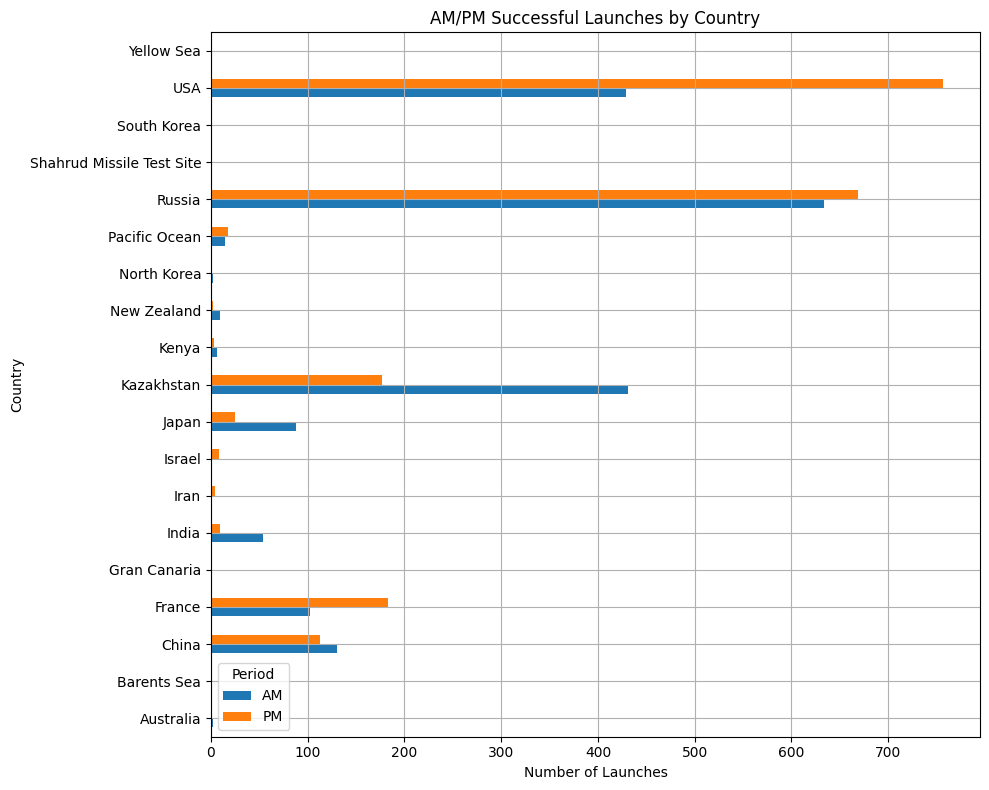

In [ ]:
import matplotlib.pyplot as plt
# Step 6: Plot horizontal bar chart
pivot.plot(kind='barh', grid=True, figsize=(10, 8), title="AM/PM Successful Launches by Country")

plt.xlabel('Number of Launches')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

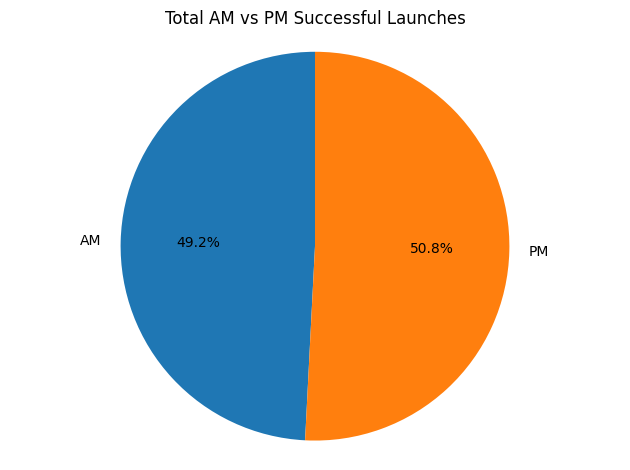

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Get total AM and PM successful launches
total_am = pivot['AM'].sum()
total_pm = pivot['PM'].sum()

# Step 2: Create a Series for plotting
launch_totals = pd.Series({'AM': total_am, 'PM': total_pm})

# Step 3: Plot as pie chart
launch_totals.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    title='Total AM vs PM Successful Launches',
    ylabel=''
)

plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Load the dataset
df = pd.read_csv('health_readmissions.csv', sep=';')

# Separate features (X) and target (y)
# Assuming 'readmitted_within_30days' is the target variable
# and all other columns are features.
# Adjust the column name if it's different in the actual CSV.
if 'readmitted_within_30days' in df.columns:
    X = df.drop('readmitted_within_30days', axis=1)
    y = df['readmitted_within_30days']
else:
    raise ValueError("Target column 'readmitted_within_30days' not found in the dataset.")

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Apply Mutual Information
# Mutual Information works best with discrete target variables, which we have (binary)
# It can work with continuous features, but can also work with discrete features.
# For continuous features, it estimates the mutual information.
# We've already handled categorical features by one-hot encoding.
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a pandas Series for better visualization of scores
mi_series = pd.Series(mi_scores, name="Mutual Information Scores", index=X.columns)

# Sort the features by Mutual Information score in descending order
mi_series = mi_series.sort_values(ascending=False)

# Report the top 5 most relevant features
top_5_features = mi_series.head(5)

print("Top 5 most relevant features based on Mutual Information:")
print(top_5_features)

ValueError: Input X contains NaN.

# Health Readmission Prediction

This project aims to predict whether a patient will be readmitted to the hospital within 30 days based on various health and demographic factors.

## Data

The dataset used in this project is `health_readmissions.csv`. It contains the following columns:

- age
- sex
- residence_type
- systolic_bp
- diastolic_bp
- cholesterol
- hemoglobin
- past_visits
- length_of_stay
- insurance_status
- readmitted_within_30days (target variable)

## Project Steps

1. **Data Loading and Exploration:** Load the dataset and perform initial exploration to understand the data structure, identify missing values, and understand the distribution of features.
2. **Data Preprocessing:** Handle missing values and encode categorical features to prepare the data for model training.
3. **Feature Selection:** Use techniques like Mutual Information to identify the most relevant features for predicting readmission.
4. **Model Training:** Train a classification model (e.g., K-Nearest Neighbors) on the preprocessed data.
5. **Model Evaluation:** Evaluate the performance of the trained model using appropriate metrics (e.g., accuracy, confusion matrix).
6. **Prediction:** Use the trained model to make predictions on new data.

## Code Overview

The notebook contains code for:

- Loading the data (`health_readmissions.csv`).
- Data cleaning and preprocessing, including handling missing values and encoding categorical features.
- Applying Mutual Information for feature selection.
- Training a K-Nearest Neighbors classifier.
- Evaluating the model's performance.